In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

RANDOM_SEED = 0xdeadbeef

# Neural Networks Part 1

# Task 1: Simple Neural Networks by Hand (3 Points)

In this task we use a very simple neural network to derive by hand the formulas for updating the weights via gradient descent. 

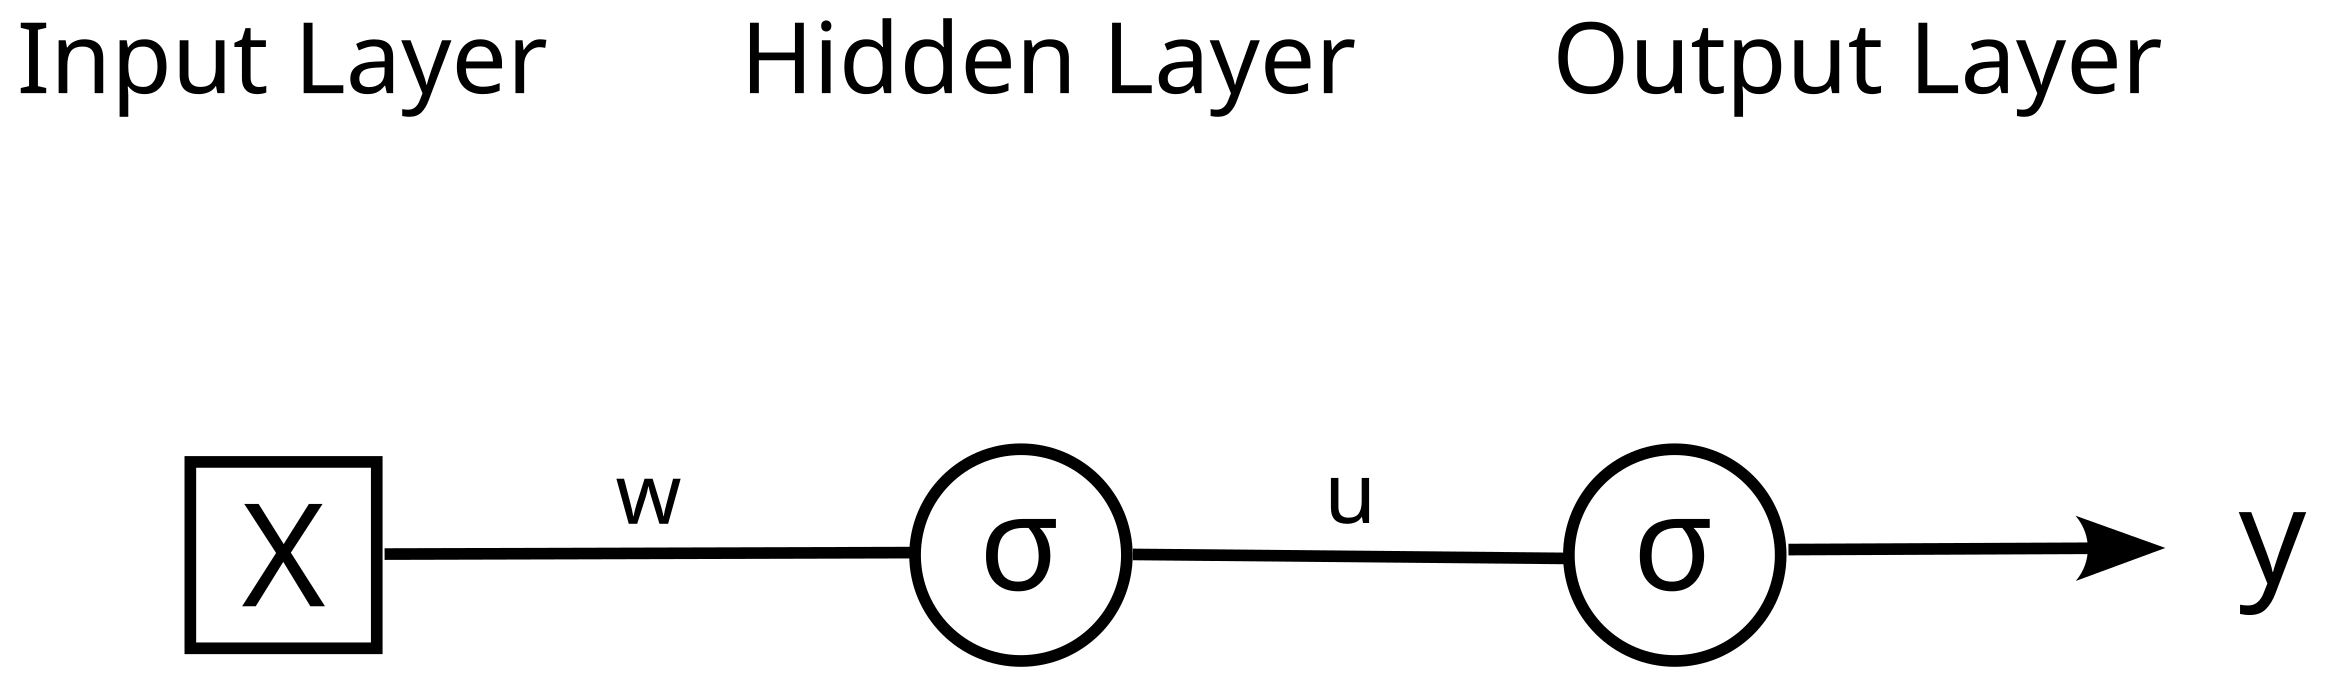

In the figure above, you see a very simple feed-forward neural network.
It has one input node $x$, one hidden node, and one output node, which outputs the value $y$. Each edge has a weight that is multiplied by the value of the node on the left and passed as input to the node on the right. The hidden and output nodes compute an activation function $\sigma$ of their respective inputs.

We write $NN(x, w, u)$ to denote the function computed by this network. Then
\begin{equation}
  NN(x, w, u) = \sigma(u \cdot \sigma(wx))
\end{equation}

Note that for this simple example, we do not have any biases for the nodes. In addition, you do not see a sum of the weighted input values of a node, since each node has exactly one input value. 

The goal of training a neural network is to find good values for its weights (in this simple case $w$ and $u$) such that it computes something we are interested in.

One common method to achieve this is by using *Gradient Descent*. To apply gradient descent, we have to be able to compute the derivatives of our network with respect to its weights.


For example, the derivative of $NN(x, w, u)$ with respect to $u$ is:

\begin{align}
  \frac{\mathrm{d}}{\mathrm{d}u} NN(x, w, u) &= \\
  \frac{\mathrm{d}}{\mathrm{d}u}\sigma(u \cdot \sigma(wx)) &= \\
  \sigma'(u \cdot \sigma(wx)) \frac{\mathrm{d}}{\mathrm{d}u} (u \cdot \sigma(wx)) &= \\
  \sigma'(u \cdot \sigma(wx)) \cdot \sigma(wx)
\end{align}

We write $\sigma$ for the activation function of the network and $\sigma'$ for the first derivative of the activation function. The main trick is to apply the chain rule for derivatives multiple times.

### Task 1a. (1 Point) Compute $\frac{\mathrm{d}}{\mathrm{d}w}NN(x, w, u)$.

Solution:

\begin{align}
  \frac{\mathrm{d}}{\mathrm{d}w}NN(x, w, u) &= \\
  \frac{\mathrm{d}}{\mathrm{d}w}\sigma(u \cdot \sigma(wx)) &= \\
  \sigma'(u \cdot \sigma(wx)) \cdot \frac{\mathrm{d}}{\mathrm{d}w}(u \cdot \sigma(wx)) &= \\
  \sigma'(u \cdot \sigma(wx) \cdot u \cdot \sigma'(wx) \cdot \frac{\mathrm{d}}{\mathrm{d}w}wx &= \\
  \sigma'(u\sigma(wx))u\sigma'(wx)x
\end{align}

## 📢 **HAND-IN** 📢: in Moodle

* Your calculation and solution for $\frac{\mathrm{d}}{\mathrm{d}w}NN(x, w, u)$

### Loss functions

During training we usually try to minimize a *loss function* that measures how far away our predictions are from a desired value. One example of a loss function you have seen before is the *squared error*:

$\mathcal{L}(y, p) = \frac{1}{2}(p - y)^{2}$

Here $y$ is the desired value and $p$ is some predicted value.

For example, if we try to get good predictions for a sample $(x, y)$ (with $x$ being the input value and $y$ the desired output value) using our neural network above, we would compute:

$\mathcal{L}(y, NN(x, w, u)) = \frac{1}{2}(NN(x, w, u) - y)^{2}$.

During gradient descent training, we would then have to compute the gradient of the loss with respect to the network parameters, for example:

\begin{align}
  \frac{\mathrm{d}}{\mathrm{d}u}\mathcal{L}(y, NN(x, w, u)) &= \\
  \mathcal{L}'(y, NN(x, w, u)) \frac{\mathrm{d}}{\mathrm{d}u}NN(x, w, u)
\end{align}

Here we write $\mathcal{L}'$ to denote $\frac{\mathrm{d}}{\mathrm{d}p}\mathcal{L}(y, p)$.

### Task 1b. (1 Point) Compute $\frac{\mathrm{d}}{\mathrm{d}p}\frac{1}{2}(p - y)^{2}$

Solution:

\begin{equation}
  \frac{\mathrm{d}}{\mathrm{d}p}\frac{1}{2}(p - y)^{2} = p - y
\end{equation}

## 📢 **HAND-IN** 📢: In Moodle

* Your solution for $\frac{\mathrm{d}}{\mathrm{d}p}\frac{1}{2}(p - y)^{2}$

### A larger network

We now study a slighly more complex neural network, and show how to implement it from scratch. 

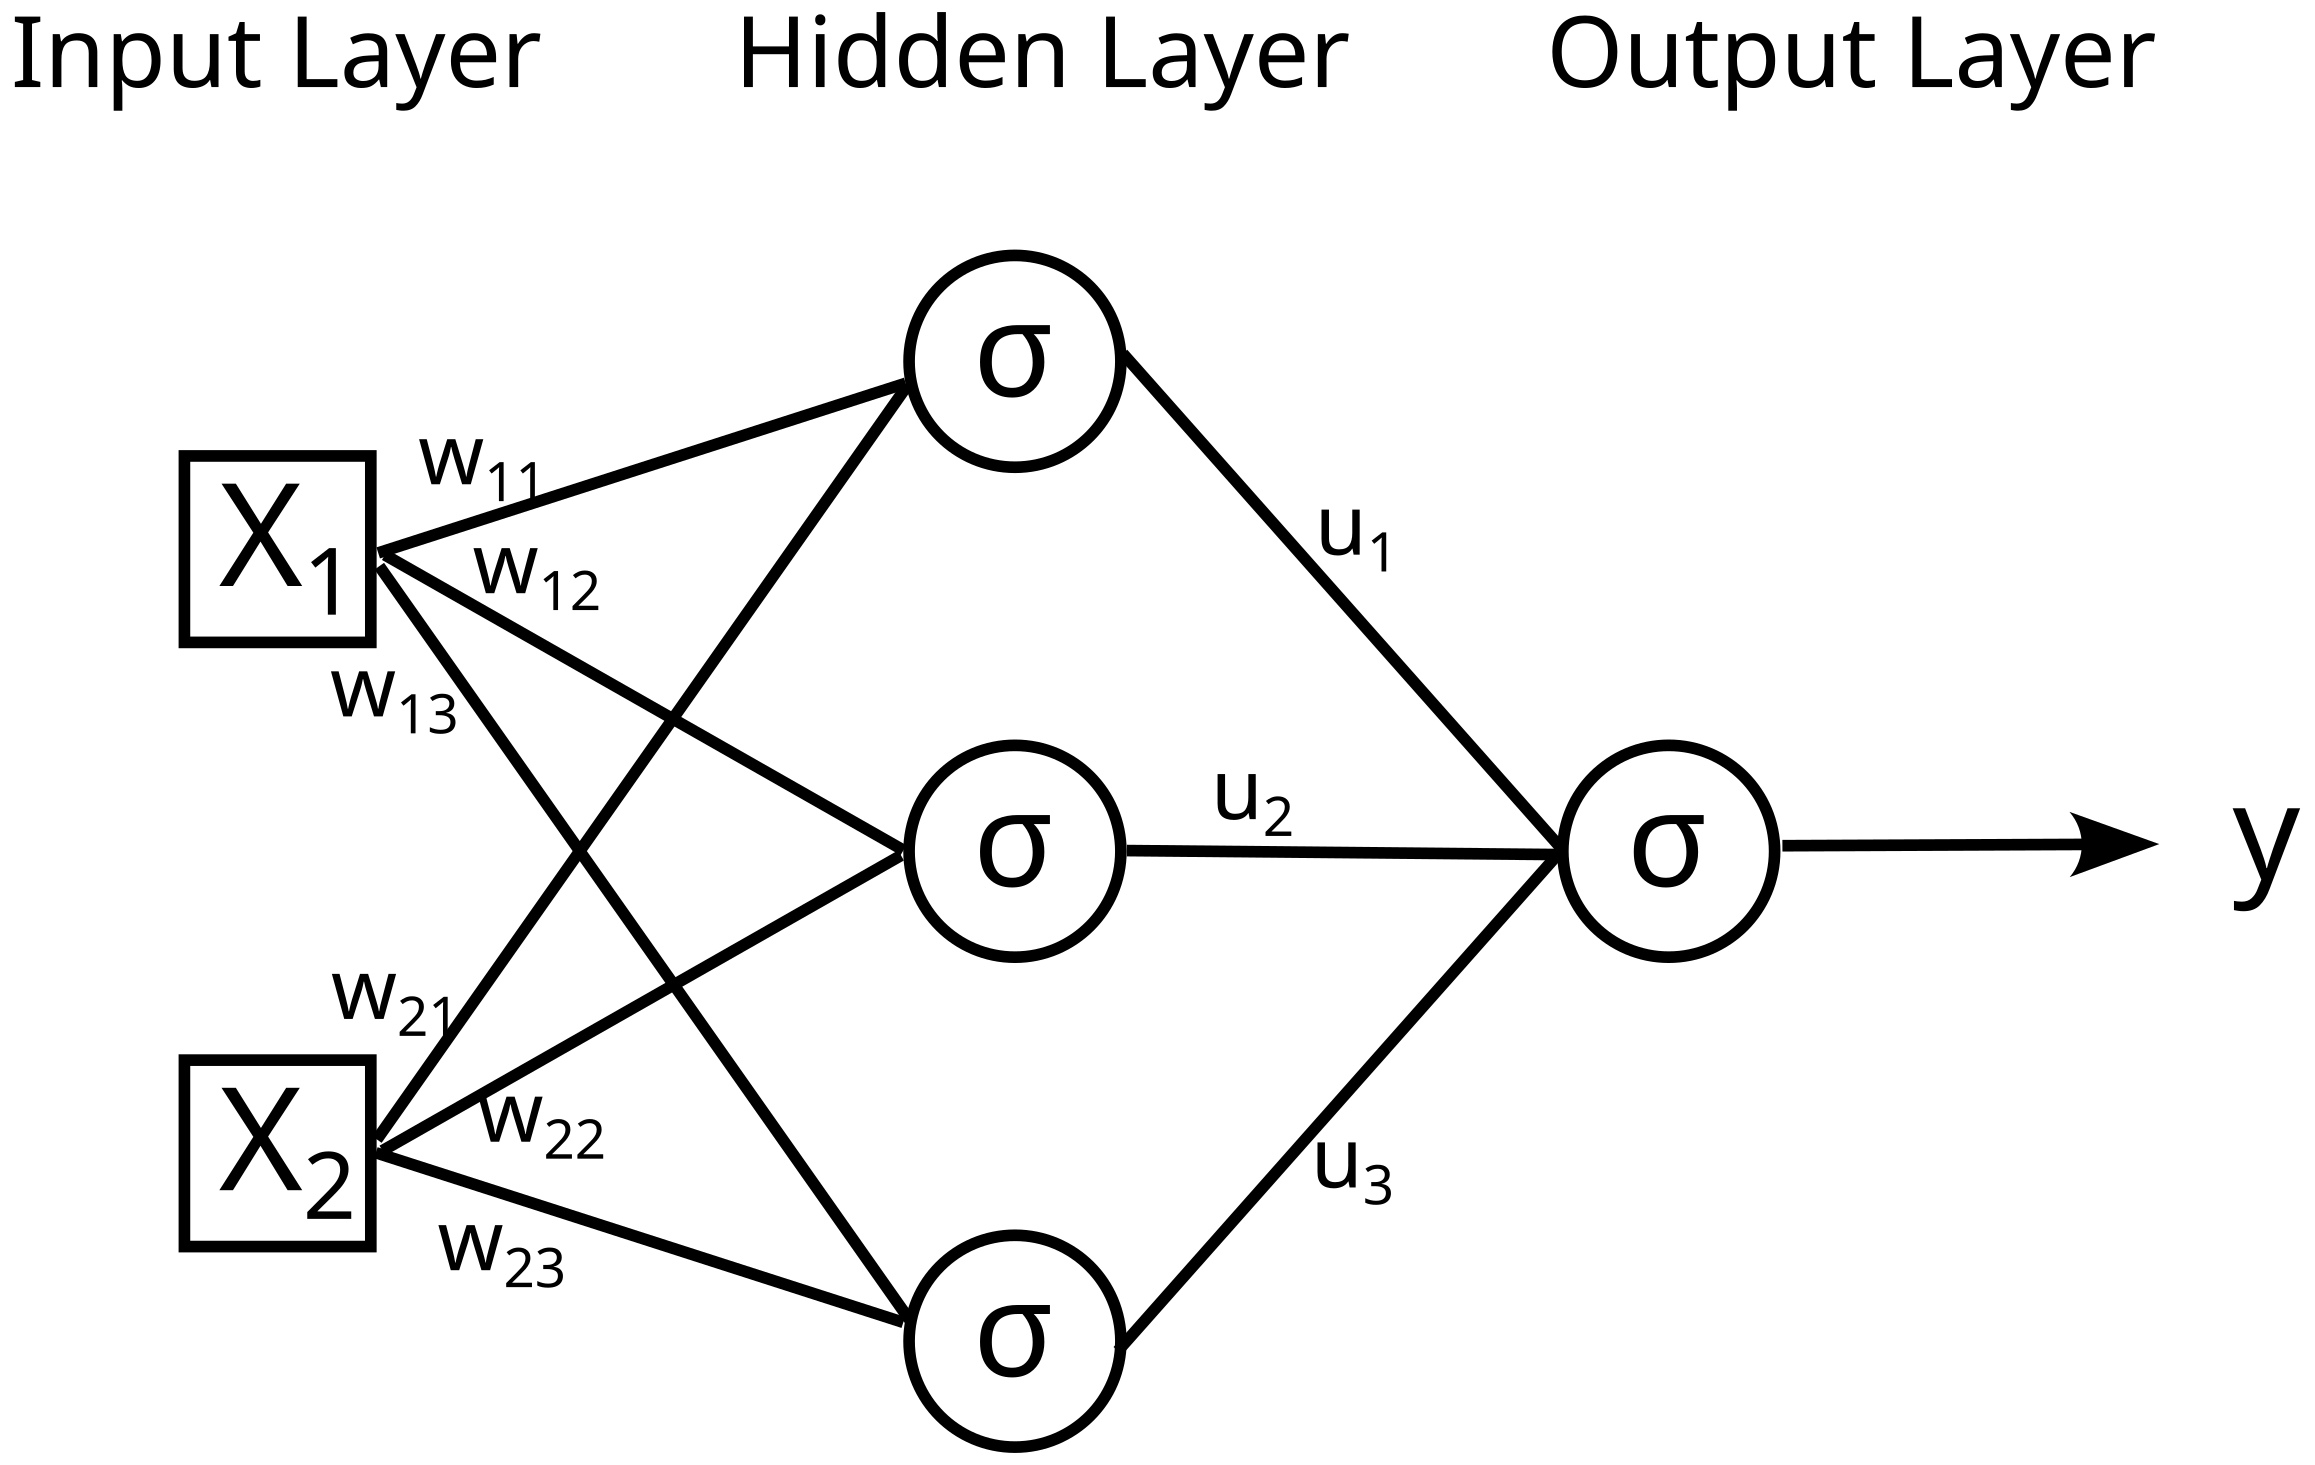

In the figure above, you can see the diagram of a slightly larger feed-forward neural network. It has 2 input nodes, $x_1$ and $x_2$, 3 hidden nodes, and 1 output.

Each edge has a weight which is multiplied with the output of the node on the left and sent as input to the node on the right. The $\sigma$ stands for an activation function which is applied at the nodes of the hidden and output layer. Like in Task 1a, we do not use biases for the nodes to keep calculations simple. 

We write $NN(x, W, u)$ to denote the function computed by the above neural network, where

\begin{equation}
  W = \left[{
    \begin{array}{ccc}
      w_{11} & w_{12} & w_{13} \\
      w_{21} & w_{22} & w_{23} \\
    \end{array}
  }\right]
\end{equation}

and

\begin{equation}
  u = \left[{
    \begin{array}{ccc}
      u_1 & u_2 & u_3 \\
    \end{array}
  }\right]
\end{equation}


The full formula to compute an output for this network is:

\begin{align}
  y &= NN(x, W, u) \\
  &= \sigma(u_1\sigma(w_{11}x_1 + w_{21}x_2) + u_2\sigma(w_{12}x_1 + w_{22}x_2) + u_3\sigma(w_{13}x_1 + w_{23}x_2)) \\
  &= \sigma(\sum_{i = 1}^{3} u_i\sigma(w_{1i}x_1 + w_{2i}x_2))
\end{align}

### Task 1c. (1 Point) Compute the output of the larger network (by hand)

Assume that all weights are equal to $1$: $w_{ji} = 1$ and $u_i = 1$.
We will use the so called **relu** activation function:
\begin{equation}
  \sigma(x) = relu(x) = 
  \begin{cases}
    x & \text{if } x > 0 \\
    0 & \text{else}
  \end{cases}
\end{equation}

Compute the output $NN(x, W, u)$ for:

* $x_1 = 1$ and $x_2 = 1$
* $x_1 = 1$ and $x_2 = -1$

Solution:

* $x_1 = 1$ and $x_2 = 1$: $6$
* $x_1 = 1$ and $x_2 = -1$: $0$

## 📢 **HAND-IN** 📢: in Moodle

* output of the network for $x_1 = 1$ and $x_2 = 1$
* output of the network for $x_1 = 1$ and $x_2 = -1$

### Derivatives for the larger Network

Below we give the full formulae to compute the derivatives for all parameters of the network.
Try to read and understand them.

Derivative of loss with respect to $u_i$:

\begin{align}
  \frac{\mathrm{d}}{\mathrm{d}u_i} \mathcal{L}(y, NN(x, W, u)) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \frac{\mathrm{d}}{\mathrm{d}u_i} NN(x, W, u) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \sigma'(\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \cdot \frac{\mathrm{d}}{\mathrm{d}u_i}\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \sigma'(\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \cdot \sigma(w_{1i}x_1 + w_{2i}x_2)
\end{align}

Derivative of loss with respect to $w_{ji}$:

\begin{align}
  \frac{\mathrm{d}}{\mathrm{d}w_{ji}} \mathcal{L}(y, NN(x, W, u)) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \frac{\mathrm{d}}{\mathrm{d}w_{ji}} NN(x, W, u) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \sigma'(\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \cdot \frac{\mathrm{d}}{\mathrm{d}w_{ji}}\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2) &= \\
  \mathcal{L}'(y, NN(x, W, u)) \cdot \sigma'(\sum_{i=1}^{3}u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \cdot u_i \sigma'(w_{1i}x_1 + w_{2i}x_2)x_j
\end{align}

# Task 2. A simple numpy-only implementation of our network (5 Points)

In this task we will implement the above network $NN(x, W, u)$ in numpy and try to solve the XOR-problem with it.

In the next cell, we set up the simplest instance of the XOR-problem with 4 data points. Observe that there is no straight line that separates the two classes properly.

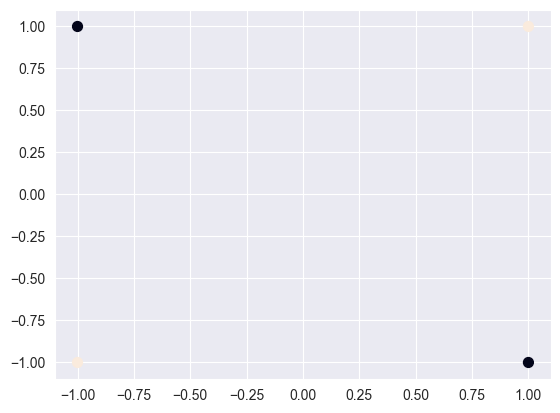

In [2]:
X = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1],
])

y = np.array([1, 0, 0, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In the next cell, we set the initial weights of our network $W$ and $u$ randomly. We will update them in the training loop further down.

In [3]:
# We randomly initialize the weight matrices W, u 
# with weights uniformly in [-1, 1]

rng = np.random.default_rng(RANDOM_SEED)

W = 2.*rng.random((2, 3)) - 1.
u = 2 * rng.random(3) - 1.


We will use **relu** activation as our activation function for the network:
\begin{equation}
  relu(x) = 
  \begin{cases}
    x & \text{if } x > 0 \\
    0 & \text{else}
  \end{cases}
\end{equation}

In [4]:
def activation(x: np.array) -> np.array:
  """
  Compute relu activation for a given input

  x: a numpy array of any shape (containing floats)
  """
  return np.maximum(0., x)

The derivative of the *relu* function is undefined at $x = 0$. We choose to set it to $0$ and define:

\begin{equation}
  \frac{\mathrm{d}}{\mathrm{d}x}relu(x) = 
  \begin{cases}
    1 & \text{if } x > 0 \\
    0 & \text{else}
  \end{cases}
\end{equation}


In [5]:
def derivative_activation(x: np.array) -> np.array:
  """
  Compute the derivative of relu activation for a given input.

  x: a numpy array of any shape (containing floats)
  """
  # the comparison here results in an array of booleans, which we cast to float 
  return (x > 0.).astype(float)

### Task 2a. Implement the forward pass

You now should have all the tools to compute the output of the neural network
for a given input $(x_1, x_2)$.

We call this computation the *forward pass* of the network, because we pass values through the network layer by layer from input to output.

Below, we have given you again the function computed by the network. In the last line we added the matrix notation.

\begin{align}
  NN(x, W, u) &= \sigma(u_1\sigma(w_{11}x_1 + w_{21}x_2) + u_2\sigma(w_{12}x_1 + w_{22}x_2) + u_3\sigma(w_{13}x_1 + w_{23}x_2)) \\
  &= \sigma(\sum_{i = 1}^{3} u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \\
  &= \sigma(u\sigma(x^TW))
\end{align}

In [6]:
def forward_pass(
  x: np.array,
  W: np.array,
  u: np.array,
):
  """
  Implement the forward pass for our network NN(x, W, u)

  x: a 2-element vector containing x_1 and x_2 (numpy array of shape (2,))
  W: a 2x3 matrix containing weights w_ji (numpy array of shape (2, 3))
  u: a 3-element vector containing u_i (numpy array of shape (3,))

  In this notation the index i goes from 1 to 3 and refers to hidden nodes
  the index j goes from 1 to 2 and indexes the input dimensions

  Note: numpy array indices start from 0 not from 1
  """
  return activation(u @ activation(x.T @ W))

In the next cell, we compute the predictions of our network for our data:

In [7]:
print("index", "x", "y", "prediction", sep="\t")
for i in range(4):
  print(i, X[i, :], y[i], forward_pass(X[i, :], W, u), sep="\t")

index	x	y	prediction
0	[-1 -1]	1	0.11007837480005991
1	[-1  1]	0	0.6756407940564695
2	[ 1 -1]	0	1.188635422350682
3	[1 1]	1	0.6284939226766805


### Computing Gradients

In the next cell we implement the formulas to compute all partial derivatives for the weights of our network according to the formulae we gave above in Section "Derivatives for the larger Network".

You should at least understand what the inputs and outputs mean, but you do not necessarily have to fully understand the implementation.

In [8]:
def grads(y, x, W, u):
  """
  Compute all partial derivatives of the loss at the sample x, y
  for all weights u_i and w_ji in our network

  y: float indicating the true label of the sample (either 0. or 1.)
  x: a 2-element vector containing x_1 and x_2 of our sample (numpy array of shape (2,))
  W: a 2x3 matrix containing weights w_ji (numpy array of shape (2, 3))
  u: a 3-element vector containing u_i (numpy array of shape (3,))

  returns:
    grad_u: a 3-element vector containing partial derivatives d/du_i
    grad_w: a 2x3 matrix containing partial derivatives d/dw_ji
  """
  pred = forward_pass(x, W, u)

  # compute derivative of our squared error loss
  derivative_loss = pred - y

  # compute derivative of the output activation
  deriv_output = derivative_activation(u @ activation(x.T @ W))

  grad_u = np.zeros_like(u)
  for i in range(3):
    # compute derivatives with respect to u_i according to the formula in Task 1
    grad_u[i] = derivative_loss * deriv_output * activation(W[:, i] @ x)

  grad_w = np.zeros_like(W)
  for i in range(3):
    for j in range(2):
      # compute derivatives with respect to w_ji according to the formula in Task 1
      grad_w[j, i] = derivative_loss * deriv_output * u[i] * derivative_activation(W[:, i] @ x) * x[j]
  
  return grad_u, grad_w


### Task 2b. Training the network using Stochastic Gradient Descent

Below we give you the setup for the main learning loop. Your task is to implement the weight updates according to stochastic gradient descent.

For stochastic gradient descent, at each time step $t$ we sample one data point $x^{(t)}$ and its label (the desired output) $y^{(t)}$.
Let $L^{(t)} = \mathcal{L}(y^{(t)}, NN(x^{(t)}, W, u)$ be the loss at time $t$. Then we update our weights as follows:

\begin{align}
  u_{i}^{(t+1)} = u_{i}^{(t)} - \alpha \frac{\mathrm{d}}{\mathrm{d}u_i}L^{(t)} \\
  w_{ji}^{(t+1)} = w_{ji}^{(t)} - \alpha \frac{\mathrm{d}}{\mathrm{d}w_{ji}}L^{(t)} \\
\end{align}

where $\alpha$ denotes the learning rate.

*Note:* In this simple example where we try to learn a very simple xor-function we only have 4 samples. To show the learning dynamics we choose stochastic gradient descent over batch gradient descent.

#TODO: In the next cell, 
* choose an appropriate `learning_rate` $\alpha$
* choose a maximum number of update steps `n_steps`
* implement the weight updates for `W` and `u`

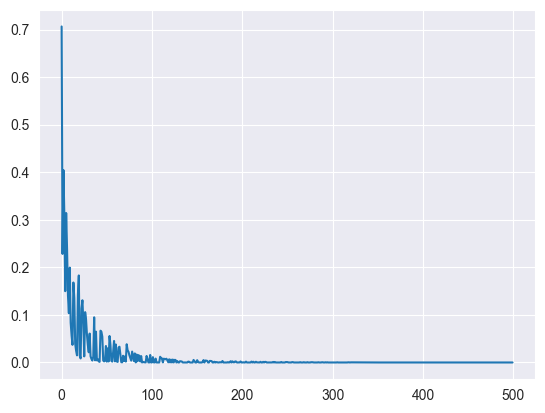

In [9]:
learning_rate = 0.1
n_steps = 500

losses = []
for t in range(n_steps):

  # randomly sample one of the 4 data points
  sample_ix = rng.integers(4)
  x_t = X[sample_ix]
  y_t = y[sample_ix]

  # compute and log squared error for the current sample
  loss = 0.5 * (y_t - forward_pass(x_t, W, u))**2
  losses.append(loss)

  # compute gradients (partial derivatives of our weights)
  grad_u, grad_w = grads(y_t, x_t, W, u)

  # update our weights
  W -= learning_rate * grad_w
  u -= learning_rate * grad_u

# plot learning curve
plt.plot(np.arange(n_steps), losses)


In the next cell, we compute the predictions of our network on our data after training:

In [10]:
print("index", "x", "y", "prediction", sep="\t")
for i in range(4):
  print(i, X[i, :], y[i], forward_pass(X[i, :], W, u), sep="\t")

index	x	y	prediction
0	[-1 -1]	1	0.9999996271009557
1	[-1  1]	0	0.00819817425473299
2	[ 1 -1]	0	0.0010807954282205476
3	[1 1]	1	0.9999651544854249


## 📢 **HAND-IN** 📢: in Moodle

* your implementation of `forward_pass` (Task 2a.)
* your weight updates (Task 2b.)
* plot of your learning curve (Task 2b.)

# Task 3. Neural Networks in Keras (3 Points)

We will now implement the network from above in **Keras**. [Keras](https://keras.io/) is a relatively simple and user friendly library to implement neural networks.

In [11]:
!pip install keras

You should consider upgrading via the 'C:\Users\marcv\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In this task, we will use a slightly more complex dataset. It is similar to the XOR-problem, but has more training samples, which makes the process more interesting.

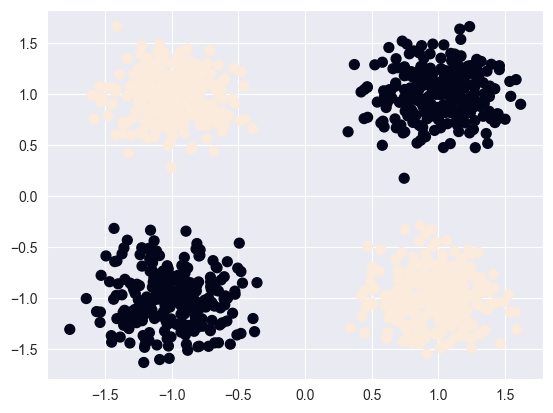

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
  n_samples=1000,
  n_features=2,
  centers=np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
  ]),
  cluster_std=.25,
  shuffle=True,
  random_state=RANDOM_SEED,
)
y[y == 2] = 1
y[y == 3] = 0

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

Below we implement the exact same neural network that we have been working with so far.

First we define an empty `Sequential` model. This is the most common type of model, where values are passed from layer to layer sequentially.

We then add various layers to our model. We use two types of layers: `Dense` and `Activation`. 

The `Dense` layer implements the weighted sum and the `Activation` layer implements the activation function.

A `Dense` layer implements a simple linear transform (matrix multiplication + offset). For a given input $x$ it computes: $Wx + b$. The matrix $W$ contains the weights of the layer and $b$ is the so-called "bias" of the layer. Note that in our original network we did not use any biases, so we set `use_bias=False` below. The first argument to the `Dense` class defines the number of outputs of the layer. The argument `input_shape` defines the number of inputs.

An `Activation` layer implements the various activation functions. We use *relu* activations, as in our hand-made network above. Activation functions are applied **separately** to each node and we therefore do not have to define input and output dimensions.


In [13]:
from keras import Sequential
from keras.layers import Activation, Dense

In [14]:
model = Sequential()
model.add(Dense(3, input_shape=(2,), use_bias=False))
model.add(Activation("relu"))
model.add(Dense(1, input_shape=(3,), use_bias=False))
model.add(Activation("relu"))


TODO: Before you continue: How many parameters does this neural network have? 

The method `model.summary()` gives an overview of the different layers in our models, showing in particular the number of trainable parameters in our network.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In the next cell, we prepare the model for training using the `.compile` method.
We have to tell it what kind of optimization algorithm we want to use with the `optimizer` argument. To stay consistent with the example above, we choose `optimizer="sgd"` for "stochastic gradient descent".
Similarly, we have tell it what loss function to minimize. We choose `loss="mse"` (even though for classification, `loss='binary_crossentropy` would be more appropriate, but again we want to stay close to the manual example above).

By default, keras will log the loss during training. We can additionally ask it to compute and log additional metrics. Below, we pass `metrics=['accuracy']` to also log accuracy while training.

**Note:** accuracy and loss will be computed and logged on the **training data**

In [16]:
model.compile(optimizer="sgd", loss="mse", metrics=['accuracy'])

Finally, we can train our model using the `.fit` method. It takes the training data `X` and desired values `y` as input. The argument `epochs` defines how many times we will loop over our dataset while updating, and `batch_size` defines how many data points will be used to update the weights at the same time. A `batch_size > 1` corresponds to batch gradient descent.

During training, Keras will indicate progress and log the loss, as well as additional metrics for each epoch.

The `.fit` method returns a `History` object that contains (among other things) the logged losses and metrics for each epoch.

In [17]:
history = model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
1000/1000 [==============================] - 1s 909us/step - loss: 0.2675 - accuracy: 0.7440
Epoch 2/10
1000/1000 [==============================] - 1s 980us/step - loss: 0.2599 - accuracy: 0.7500
Epoch 3/10
1000/1000 [==============================] - 1s 919us/step - loss: 0.0658 - accuracy: 0.9480
Epoch 4/10
1000/1000 [==============================] - 1s 877us/step - loss: 0.0181 - accuracy: 0.9970
Epoch 5/10
1000/1000 [==============================] - 1s 878us/step - loss: 0.0177 - accuracy: 0.9990
Epoch 6/10
1000/1000 [==============================] - 1s 886us/step - loss: 0.0181 - accuracy: 0.9970
Epoch 7/10
1000/1000 [==============================] - 1s 877us/step - loss: 0.0178 - accuracy: 0.9960
Epoch 8/10
1000/1000 [==============================] - 1s 856us/step - loss: 0.0177 - accuracy: 0.9970
Epoch 9/10
1000/1000 [==============================] - 1s 840us/step - loss: 0.0178 - accuracy: 0.9990
Epoch 10/10
1000/1000 [==============================] - 1s 953u

We can use the `History` object to plot the learning curve and accuracy over time (where time is measured in epochs, meaning number of passes over the full data set).

You should see that learning flattens after 1 epoch already.

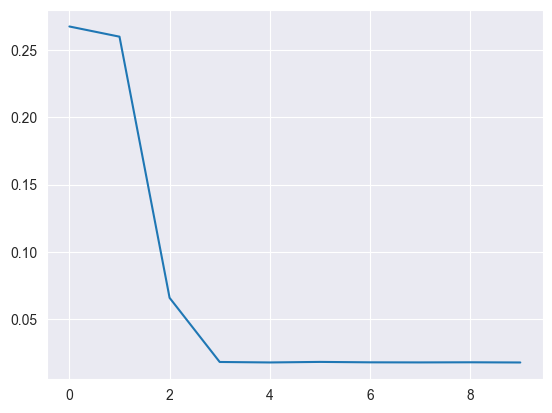

In [18]:
plt.plot(history.history['loss'])

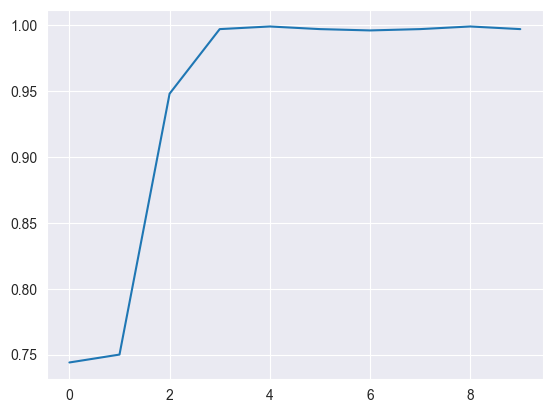

In [19]:
plt.plot(history.history['accuracy'])

### Task 3a.

Modify the code above to achieve the highest possible accuracy. You can try
* increasing the number of hidden nodes
* add more layers
* change the activation function
* use `use_bias=True`
* change loss to `'binary_crossentropy'`
* change the number of epochs and batch size

## 📢 **HAND-IN** 📢: in Moodle

* the changes you made to the network and training process
* the final accuracy you achieved